# Sensor on skateboard
Purpose of this experiment is to survey a motion of the skateboard during a skateboard trick called **Ollie**. I measure two physical quantities: gyroscope speed [rad/s] and acceleration [m/s^2]. Each quantity is represented by its x,y,z component. A smartphone and its app Phyphox works as a sensor estimating and calculating the movement and provides data to xls files. The smartphone was stuck on the skateboard from below. I made ten attempts.

The script that is processing data is written in Python. I use popular libraries such as: Pandas, NumPy, and Matplolib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Experiment consists of 10 measurements. 

In [2]:
video_time = {
    "Exp1" : "0.19",
    "Exp2" : "1.20",
    "Exp3" : "2:20",
    "Exp4(5)" : "3:07",
    "Exp5" : "4:20",
    "Exp6(7)" : "5:35",
    "Exp7(8)" : "6:30",
    "Exp8(9)" : "7:15",
    "Exp9(10)" : "7:55",
    "Exp10(11)" : "8:35 "
}

URL_keys_skateboard = {
    "Exp2" : "1jpkzzOPKSsxLzvqVpLwdUXHt7x_zDcQB",
    "Exp3" : "19LX_0Se2VrXdYUOwJQ6AJAmw0pG_iapv",
    "Exp4(5)" : "1QZ3Kd34F7ozO8-LZ8de__tSvdl9RzSTC",
    "Exp5" : "1FvSAAIozBszLYqiX12ms9RBzPSFazGnI",
    "Exp6(7)" : "1zs0ss59yLM1xqoOKM5BgZ0b0u-GRln24",
    "Exp7(8)" : "1bMeB7DgIvmBkN5g99PVUe1VFHdDDFNqE",
    "Exp8(9)" : "1pMKuiQ94n1lzXFSwPEFuVZ2aHYE2vy1-",
    "Exp9(10)" : "1Ri5iHWYBIgz8tGcbQKl8oyyJd7YBJJ0h",
    "Exp10(11)" : "1X4FWFzKxU47NVt250Gr-X45jjbo8c8Fb"
}

Each attempt takes 20 seconds, but only 2-3 seconds are vital. Following "ranges" focus on the most critical data for further analysis.

In [3]:
ranges = {
    "Exp2" : [4500,5500],
    "Exp3" : [4500,6000],
    "Exp4(5)" : [4500,5500],
    "Exp5" : [4000,5500],
    "Exp6(7)" : [4000,5000],
    "Exp7(8)" : [3500,5000],
    "Exp8(9)" : [4500,6000],
    "Exp9(10)" : [3000,4000],
    "Exp10(11)" : [6000,7500]
}

This script downloads data from Google Sheets, converts headers and plots data into the graphs. Each attempt has two graphs: Gyroscope and Accelerometer. 

In [4]:
def import_from_google (ID,name):
    google_sheet_ID=ID
    work_sheet=name
    path='https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
        google_sheet_ID,
        work_sheet
    )

    data = pd.read_csv(path)
    
    if name=="Gyroscope":
        data.columns = [c.replace(' ', '_') for c in data.columns]
        data.columns = [c.replace('_(rad/s)', '') for c in data.columns]
        data.columns = [c.replace('_(s)', '') for c in data.columns]
    else:
        data.columns = [c.replace(' ', '_') for c in data.columns]
        data.columns = [c.replace('_(m/s^2)', '') for c in data.columns]
        data.columns = [c.replace('_(s)', '') for c in data.columns]
    
    return data

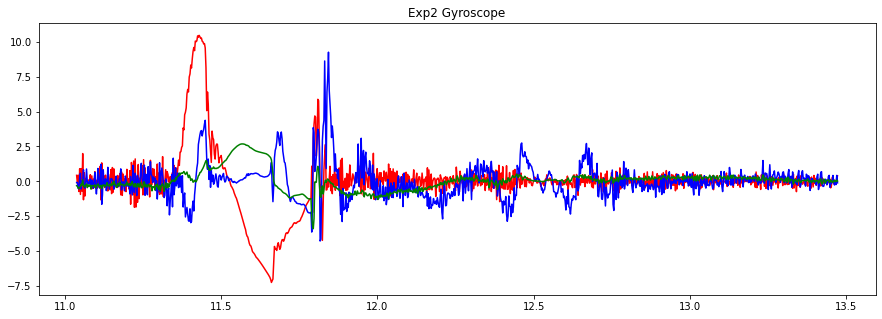

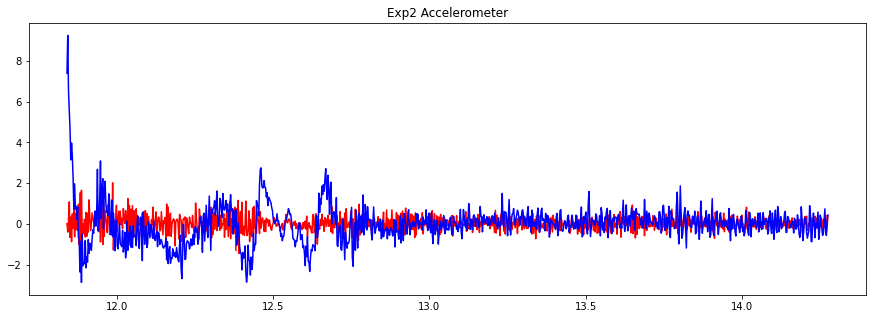

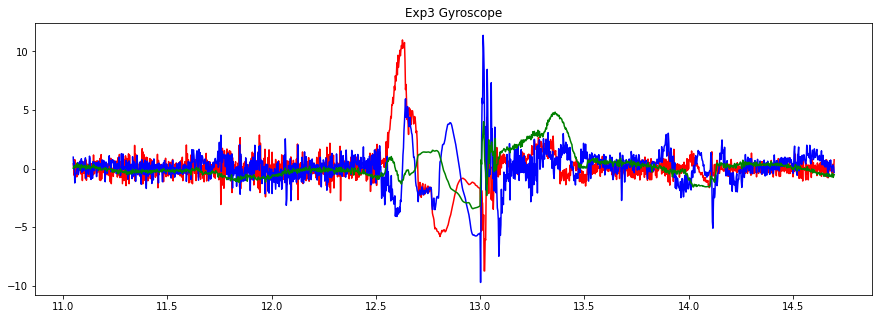

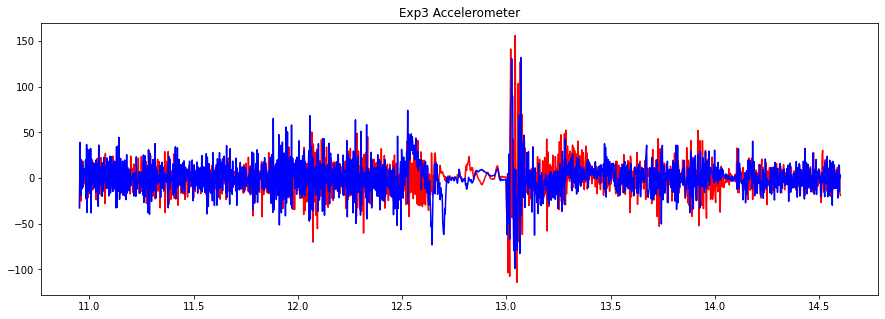

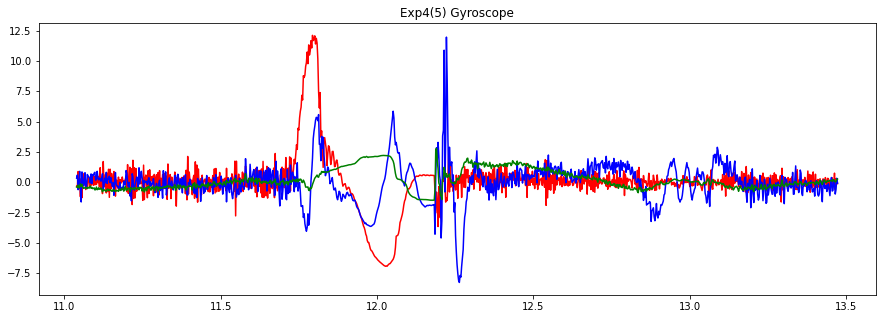

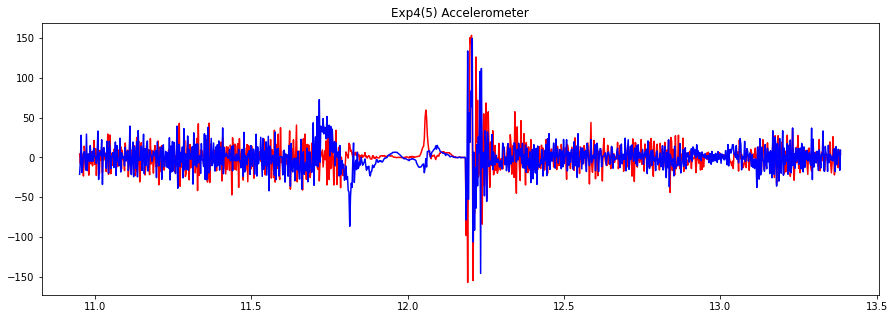

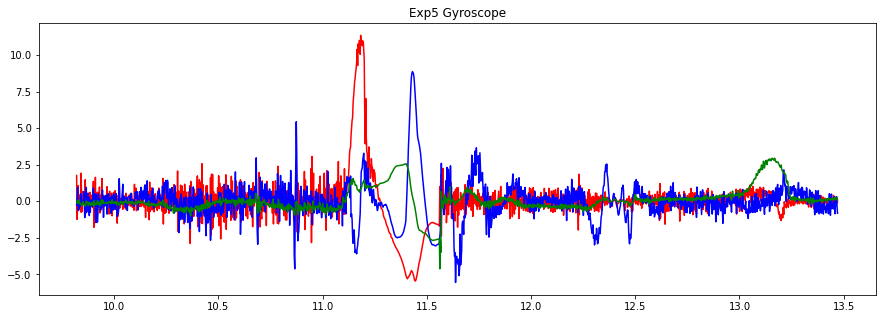

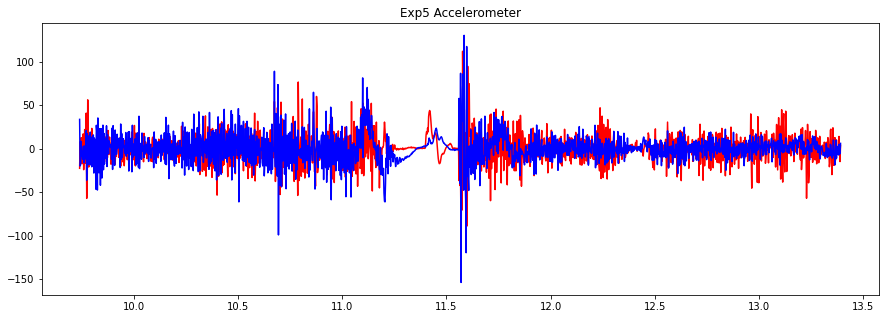

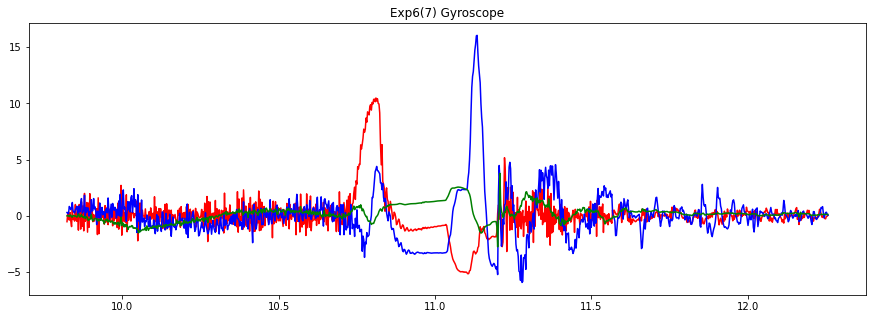

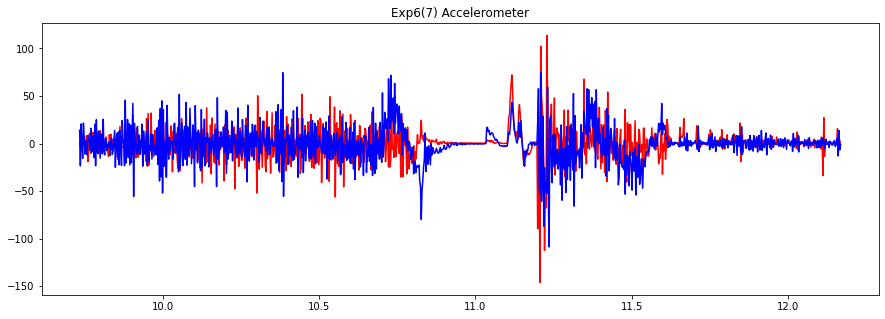

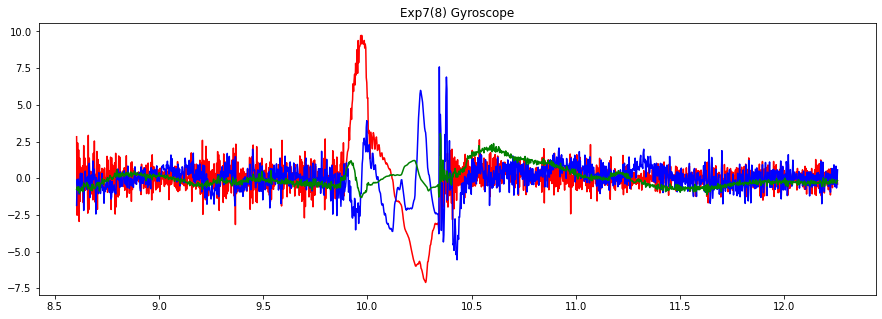

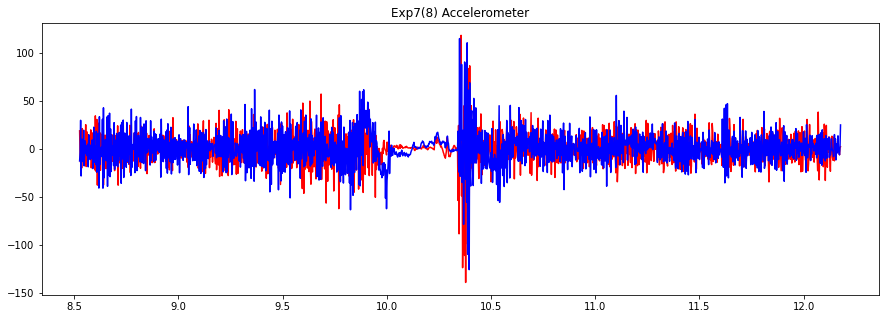

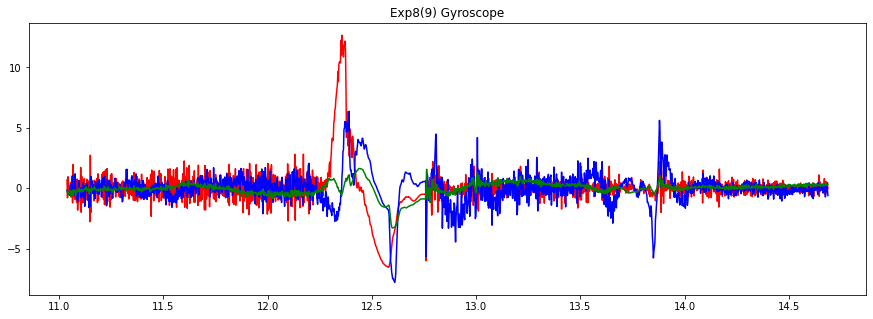

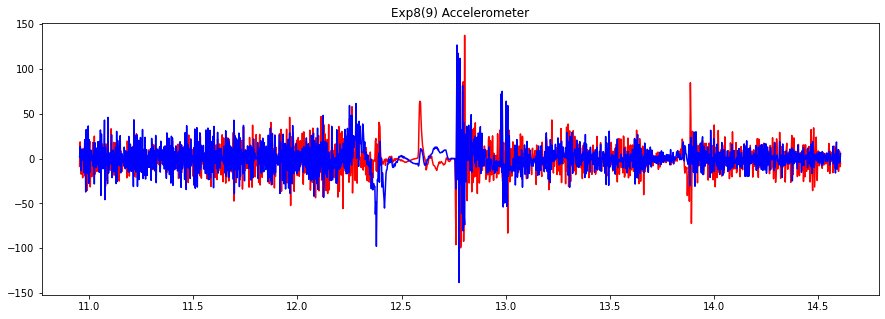

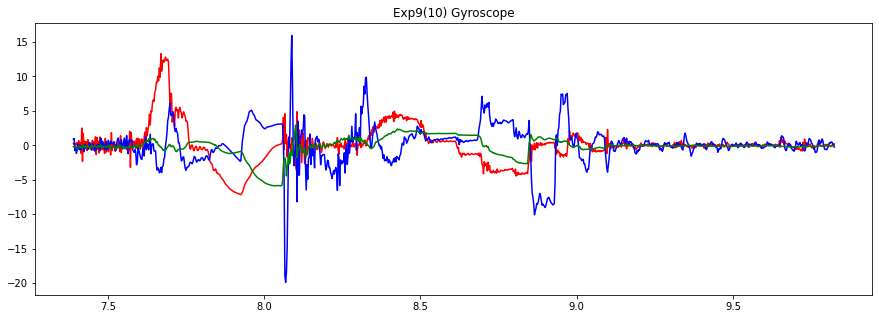

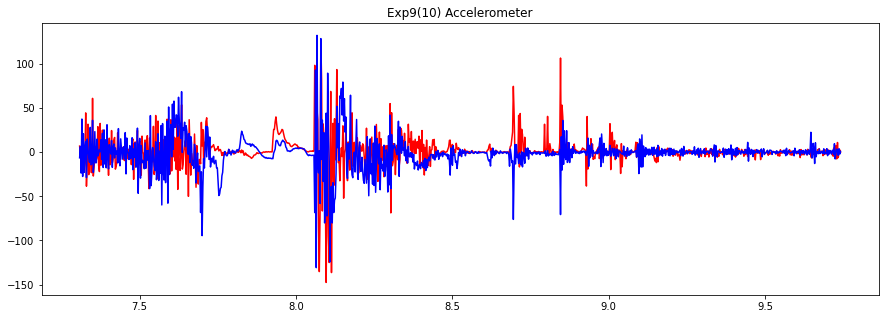

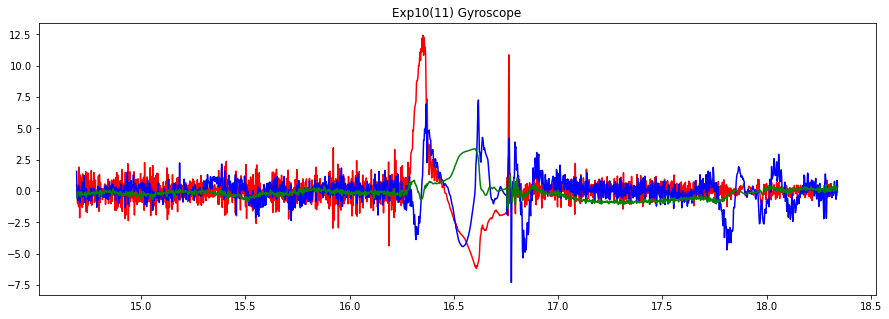

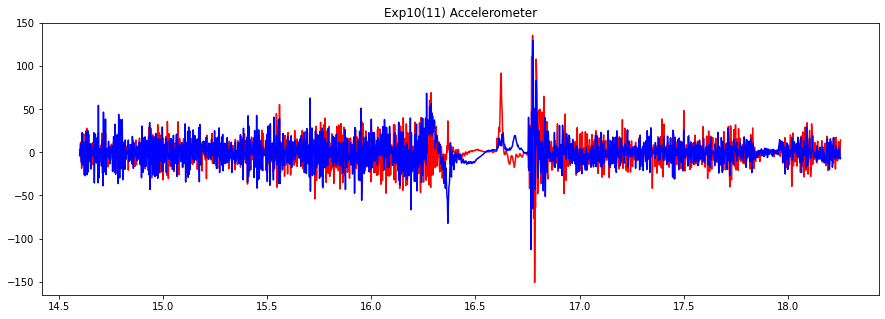

In [5]:

for i in URL_keys_skateboard:
    
    data_gyr = import_from_google(URL_keys_skateboard[i],"Gyroscope")
    data_acc = import_from_google(URL_keys_skateboard[i],"Accelerometer")
    
    a,b=ranges[i]
    
    graphdata_gyr=data_gyr.loc[a:b,:]
    graphdata_acc=data_acc.loc[a:b,:]
    
    title=i+" Gyroscope"      
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.plot(graphdata_gyr.Time, graphdata_gyr.Gyroscope_x, color="red")
    plt.plot(graphdata_gyr.Time, graphdata_gyr.Gyroscope_y, color="blue")
    plt.plot(graphdata_gyr.Time, graphdata_gyr.Gyroscope_z, color="green")

    title=i+" Accelerometer"      
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.plot(graphdata_acc.Time, graphdata_acc.Acceleration_x, color="red")
    plt.plot(graphdata_acc.Time, graphdata_acc.Acceleration_y, color="blue")
    plt.plot(graphdata_acc.Time, graphdata_acc.Acceleration_z, color="green")
    
    plt.show()